In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout

import seaborn as sns

In [2]:
raw_data = pd.read_csv('./Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [3]:
raw_data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

# Checking for empty data or NaN or Null values

In [4]:
raw_data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           0
sourceURLs                 0
dtype: int64

# removing unwanted datas

In [5]:
df = raw_data[['name','categories','reviews.text','reviews.title','reviews.rating']]

In [1]:
df.head(50)

NameError: name 'df' is not defined

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\riaz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
sentiment = SentimentIntensityAnalyzer()

In [9]:
def get_senti_score(text):
    score = sentiment.polarity_scores(text)
    return score["compound"]

In [10]:
df["s.score.title"] = df['reviews.title'].apply(lambda x: get_senti_score(x))
df["s.score.text"] = df['reviews.text'].apply(lambda x: get_senti_score(x))

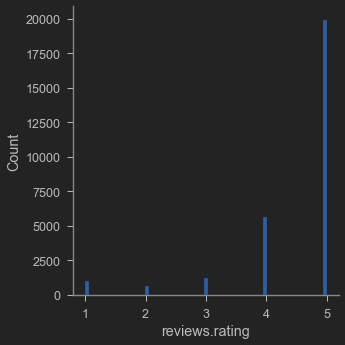

In [11]:
sns.displot(x=df['reviews.rating'])

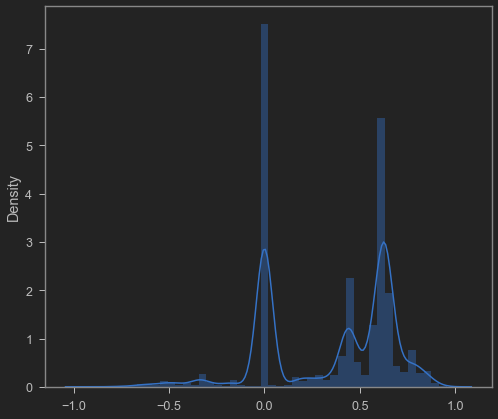

In [13]:
sns.distplot(x=df['s.score.title'])

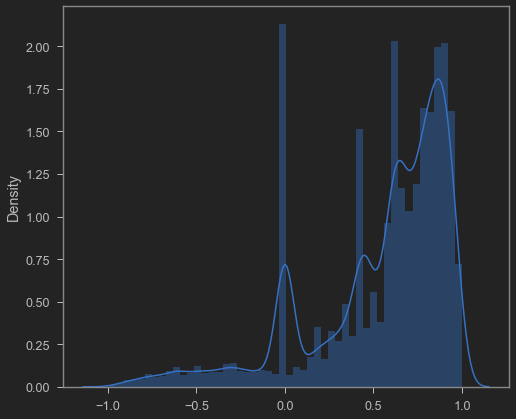

In [14]:
sns.distplot(x=df['s.score.text'])